In [8]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Converter arquivo para parquet

In [389]:
#df = pd.read_csv('dataset.csv')

#table = pa.Table.from_pandas(df)
#pq.write_table(table, 'dataset.parquet')


# Análise Exploratória de Dados (AED) 

In [9]:
df = pd.read_parquet('dataset.parquet')

In [5]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [395]:
colunas_com_id = df.filter(like='id')
colunas_com_id.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'aids',
       'solid_tumor_with_metastasis'],
      dtype='object')

In [7]:
null_counts = df.isnull().sum().sort_values(ascending=False)
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count} ")


Unnamed: 83: 91713 
d1_potassium_max: 9585 
d1_potassium_min: 9585 
h1_mbp_noninvasive_min: 9084 
h1_mbp_noninvasive_max: 9084 
apache_4a_hospital_death_prob: 7947 
apache_4a_icu_death_prob: 7947 
h1_diasbp_noninvasive_min: 7350 
h1_diasbp_noninvasive_max: 7350 
h1_sysbp_noninvasive_min: 7341 
h1_sysbp_noninvasive_max: 7341 
d1_glucose_min: 5807 
d1_glucose_max: 5807 
h1_mbp_max: 4639 
h1_mbp_min: 4639 
h1_resprate_min: 4357 
h1_resprate_max: 4357 
age: 4228 
h1_spo2_min: 4185 
h1_spo2_max: 4185 
temp_apache: 4108 
h1_diasbp_min: 3619 
h1_diasbp_max: 3619 
h1_sysbp_min: 3611 
h1_sysbp_max: 3611 
bmi: 3429 
h1_heartrate_min: 2790 
h1_heartrate_max: 2790 
weight: 2720 
d1_temp_max: 2324 
d1_temp_min: 2324 
gcs_verbal_apache: 1901 
gcs_motor_apache: 1901 
gcs_eyes_apache: 1901 
apache_2_diagnosis: 1662 
apache_3j_bodysystem: 1662 
apache_2_bodysystem: 1662 
d1_mbp_noninvasive_min: 1479 
d1_mbp_noninvasive_max: 1479 
ethnicity: 1395 
height: 1334 
resprate_apache: 1234 
apache_3j_diagnosis

## Apaga as colunas selecionadas que são de ID ou que tem uma defazagem de dados maior de 7947 

In [397]:
df = df.drop(['d1_potassium_max','d1_potassium_min','h1_mbp_noninvasive_min','h1_mbp_noninvasive_max','h1_diasbp_noninvasive_max','h1_sysbp_noninvasive_min','h1_sysbp_noninvasive_max','h1_diasbp_noninvasive_min','encounter_id', 'patient_id', 'hospital_id', 'icu_id','Unnamed: 83','apache_4a_icu_death_prob','apache_4a_hospital_death_prob'], axis = 1)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          87485 non-null  float64
 1   bmi                          88284 non-null  float64
 2   elective_surgery             91713 non-null  int64  
 3   ethnicity                    90318 non-null  object 
 4   gender                       91688 non-null  object 
 5   height                       90379 non-null  float64
 6   icu_admit_source             91601 non-null  object 
 7   icu_stay_type                91713 non-null  object 
 8   icu_type                     91713 non-null  object 
 9   pre_icu_los_days             91713 non-null  float64
 10  weight                       88993 non-null  float64
 11  apache_2_diagnosis           90051 non-null  float64
 12  apache_3j_diagnosis          90612 non-null  float64
 13  apache_post_oper

## Entendimento dos dados

In [ ]:
# Obter as colunas que começam com 'd1' ou 'h1'
#colunas_a_remover = [coluna for coluna in df.columns if coluna.startswith(('d1', 'h1'))]

# Remover as colunas do DataFrame
#df = df.drop(columns=colunas_a_remover)

# Salvar os dados em Parquet
#df.to_parquet('parte_1_profiling.parquet', engine='pyarrow')


## Tradução das colunas 

In [399]:
"""
dic = {
    'encounter_id': 'id_ncontro',
    'patient_id': 'id_paciente',
    'hospital_id': 'id_hospital',
    'age': 'idade',
    'bmi': 'imc',
    'elective_surgery': 'cirurgia_eletiva',
    'ethnicity': 'etnia',
    'gender': 'genero',
    'height': 'altura',
    'icu_admit_source': 'fonte_admissao_uti',
    'icu_id': 'id_uti',
    'icu_stay_type': 'tipo_estadia_uti',
    'icu_type': 'tipo_uti',
    'pre_icu_los_days': 'dias_de_permanencia_pre_uti',
    'weight': 'peso',
    'apache_2_diagnosis': 'diagnostico_pache_2',
    'apache_3j_diagnosis': 'diagnostico_apache_3j',
    'apache_post_operative': 'apache_pos_operatorio',
    'arf_apache': 'arf_apache',
    'gcs_eyes_apache': 'gcs_olhos_apache',
    'gcs_motor_apache': 'gcs_motor_apache',
    'gcs_unable_apache': 'gcs_incapaz_apache',
    'gcs_verbal_apache': 'gcs_verbal_pache',
    'heart_rate_apache': 'frequencia_cardiaca_apache',
    'intubated_apache': 'intubado_apache',
    'map_apache': 'map_apache',
    'resprate_apache': 'frequencia_respiratoria_pache',
    'temp_apache': 'temperatura_apache',
    'ventilated_apache': 'ventilado_apache',
    'd1_diasbp_max': 'd1_pressao_arterial_diastolica_maxima',
    'd1_diasbp_min': 'd1_pressao_arterial_diastolica_minima',
    'd1_diasbp_noninvasive_max': 'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
    'd1_diasbp_noninvasive_min': 'd1_pressao_arterial_diastólica_nao_invasiva_minima',
    'd1_heartrate_max': 'd1_frequencia_cardiaca_maxima',
    'd1_heartrate_min': 'd1_frequencia_cardiaca_minima',
    'd1_mbp_max': 'd1_pressao_arterial_media_maxima',
    'd1_mbp_min': 'd1_pressao_arterial_media_minima',
    'd1_mbp_noninvasive_max': 'd1_pressao_arterial_media_nao_invasiva_maxima',
    'd1_mbp_noninvasive_min': 'd1_pressao_arterial_media_nao_invasiva_minima',
    'd1_resprate_max': 'd1_frequencia_respiratoria_maxima',
    'd1_resprate_min': 'd1_frequencia_respiratoria_minima',
    'd1_spo2_min': 'd1_spO2_minimo',
    'd1_spo2_max': 'd1_spO2_maximo',
    'd1_sysbp_min': 'd1_pressao_arterial_sistolica_minima',
    'd1_sysbp_max': 'd1_pressao_arterial_sistolica_maxima',
    'd1_sysbp_noninvasive_min': 'd1_pressao_arterial_sistolica_nao_invasiva_minima',
    'd1_sysbp_noninvasive_max': 'd1_pressao_arterial_sistolica_nao_invasiva_maxima',
    'd1_temp_min': 'd1_temperatura_minima',
    'd1_temp_max': 'd1_temperatura_maxima',
    'h1_diasbp_min': 'h1_ressao_arterial_iastolica_minima',
    'h1_diasbp_max': 'h1_pressão_arterial_diastolica_maxima',
    'h1_diasbp_noninvasive_min': 'h1_pressao_arterial_diastolica_nao_invasiva_minima',
    'h1_diasbp_noninvasive_max': 'h1_pressao_arterial_diastolica_nao_invasiva_maxima',
    'h1_heartrate_min': 'h1_requencia_cardiaca_minima',
    'h1_heartrate_max': 'h1_frequencia_cardiaca_maxima',
    'h1_mbp_min': 'h1_pressao_arterial_media_minima',
    'h1_mbp_max': 'h1_pressao_arterial_media_maxima',
    'h1_mbp_noninvasive_min': 'h1_pressao_arterial_media_nao_invasiva_minima',
    'h1_mbp_noninvasive_max': 'h1_pressao_arterial_media_nao_invasiva_maxima',
    'h1_resprate_min': 'h1_frequencia_respiratoria_minima',
    'h1_resprate_max': 'h1_frequencia_respiratoria_maxima',
    'h1_spo2_min': 'h1_spO2_minimo',
    'h1_spo2_max': 'h1_spO2_maximo',
    'h1_sysbp_min': 'h1_pressao_arterial_sistolica_minima',
    'h1_sysbp_max': 'h1_pressao_arterial_sistolica_maxima',
    'h1_sysbp_noninvasive_min': 'h1_pressão_arterial_sistolica_nao_invasiva_minima',
    'h1_sysbp_noninvasive_max': 'h1_pressao_arterial_sistolica_nao_invasiva_maxima',
    'd1_glucose_min': 'd1_glicose_minima',
    'd1_glucose_max': 'd1_glicose_maxima',
    'd1_potassium_min': 'd1_potassio_minimo',
    'd1_potassium_max': 'd1_potassio_maximo',
    'apache_4a_hospital_death_prob': 'probabilidade_morte_no_hospital_(apache_4a)',
    'apache_4a_icu_death_prob': 'probabilidade_morte_na_uti_(apache_4a)',
    'aids': 'aids',
    'cirrhosis': 'cirrose',
    'diabetes_mellitus': 'diabetes_mellitus',
    'hepatic_failure': 'insuficiencia_hepatica',
    'immunosuppression': 'imunossupressao',
    'leukemia': 'leucemia',
    'lymphoma': 'linfoma',
    'solid_tumor_with_metastasis': 'tumor_solido_com_metastase',
    'apache_3j_bodysystem': 'sistema_corporal_apache_3j',
    'apache_2_bodysystem': 'sistema_corporal_apache_2',
    'hospital_death': 'morte_hospital'}
"""

"\ndic = {\n    'encounter_id': 'id_ncontro',\n    'patient_id': 'id_paciente',\n    'hospital_id': 'id_hospital',\n    'age': 'idade',\n    'bmi': 'imc',\n    'elective_surgery': 'cirurgia_eletiva',\n    'ethnicity': 'etnia',\n    'gender': 'genero',\n    'height': 'altura',\n    'icu_admit_source': 'fonte_admissao_uti',\n    'icu_id': 'id_uti',\n    'icu_stay_type': 'tipo_estadia_uti',\n    'icu_type': 'tipo_uti',\n    'pre_icu_los_days': 'dias_de_permanencia_pre_uti',\n    'weight': 'peso',\n    'apache_2_diagnosis': 'diagnostico_pache_2',\n    'apache_3j_diagnosis': 'diagnostico_apache_3j',\n    'apache_post_operative': 'apache_pos_operatorio',\n    'arf_apache': 'arf_apache',\n    'gcs_eyes_apache': 'gcs_olhos_apache',\n    'gcs_motor_apache': 'gcs_motor_apache',\n    'gcs_unable_apache': 'gcs_incapaz_apache',\n    'gcs_verbal_apache': 'gcs_verbal_pache',\n    'heart_rate_apache': 'frequencia_cardiaca_apache',\n    'intubated_apache': 'intubado_apache',\n    'map_apache': 'map_apa

In [400]:
df = df.rename(columns=dic)
df.columns


Index(['idade', 'imc', 'cirurgia_eletiva', 'etnia', 'genero', 'altura',
       'fonte_admissao_uti', 'tipo_estadia_uti', 'tipo_uti',
       'dias_de_permanencia_pre_uti', 'peso', 'diagnostico_pache_2',
       'diagnostico_apache_3j', 'apache_pos_operatorio', 'arf_apache',
       'gcs_olhos_apache', 'gcs_motor_apache', 'gcs_incapaz_apache',
       'gcs_verbal_pache', 'frequencia_cardiaca_apache', 'intubado_apache',
       'map_apache', 'frequencia_respiratoria_pache', 'temperatura_apache',
       'ventilado_apache', 'd1_pressao_arterial_diastolica_maxima',
       'd1_pressao_arterial_diastolica_minima',
       'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
       'd1_pressao_arterial_diastólica_nao_invasiva_minima',
       'd1_frequencia_cardiaca_maxima', 'd1_frequencia_cardiaca_minima',
       'd1_pressao_arterial_media_maxima', 'd1_pressao_arterial_media_minima',
       'd1_pressao_arterial_media_nao_invasiva_maxima',
       'd1_pressao_arterial_media_nao_invasiva_minima',
    

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 70 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   idade                                               87485 non-null  float64
 1   imc                                                 88284 non-null  float64
 2   cirurgia_eletiva                                    91713 non-null  int64  
 3   etnia                                               90318 non-null  object 
 4   genero                                              91688 non-null  object 
 5   altura                                              90379 non-null  float64
 6   fonte_admissao_uti                                  91601 non-null  object 
 7   tipo_estadia_uti                                    91713 non-null  object 
 8   tipo_uti                                            91713 non-null  object 


## Analise das colunas 



### Informações do paciente anteriores ao internamento 

In [402]:
df.columns

Index(['idade', 'imc', 'cirurgia_eletiva', 'etnia', 'genero', 'altura',
       'fonte_admissao_uti', 'tipo_estadia_uti', 'tipo_uti',
       'dias_de_permanencia_pre_uti', 'peso', 'diagnostico_pache_2',
       'diagnostico_apache_3j', 'apache_pos_operatorio', 'arf_apache',
       'gcs_olhos_apache', 'gcs_motor_apache', 'gcs_incapaz_apache',
       'gcs_verbal_pache', 'frequencia_cardiaca_apache', 'intubado_apache',
       'map_apache', 'frequencia_respiratoria_pache', 'temperatura_apache',
       'ventilado_apache', 'd1_pressao_arterial_diastolica_maxima',
       'd1_pressao_arterial_diastolica_minima',
       'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
       'd1_pressao_arterial_diastólica_nao_invasiva_minima',
       'd1_frequencia_cardiaca_maxima', 'd1_frequencia_cardiaca_minima',
       'd1_pressao_arterial_media_maxima', 'd1_pressao_arterial_media_minima',
       'd1_pressao_arterial_media_nao_invasiva_maxima',
       'd1_pressao_arterial_media_nao_invasiva_minima',
    

#### idade

In [403]:
df['idade'].describe()

count    87485.000000
mean        62.309516
std         16.775119
min         16.000000
25%         52.000000
50%         65.000000
75%         75.000000
max         89.000000
Name: idade, dtype: float64

In [404]:
df['idade'].unique()

array([68., 77., 25., 81., 19., 67., 59., 70., 45., 50., 72., 80., 48.,
       65., 78., 30., 46., 39., 79., 58., 87., 60., 85., nan, 76., 53.,
       71., 82., 52., 75., 64., 55., 73., 88., 84., 62., 56., 38., 41.,
       35., 54., 74., 49., 86., 51., 63., 61., 47., 33., 89., 36., 69.,
       57., 22., 83., 66., 42., 27., 18., 17., 37., 43., 28., 40., 20.,
       32., 34., 23., 44., 24., 26., 31., 29., 21., 16.])

#### IMC

In [405]:
df['imc'].describe()

count    88284.000000
mean        29.185818
std          8.275142
min         14.844926
25%         23.641975
50%         27.654655
75%         32.930206
max         67.814990
Name: imc, dtype: float64

In [406]:
df['imc'].unique()

array([22.73      , 27.42      , 31.95      , ..., 33.81054776,
       45.93520298, 47.17967094])

#### etinia

In [407]:
df['etnia'].unique()

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [408]:
etinia_count = df['etnia'].value_counts()
etinia_count


Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: etnia, dtype: int64

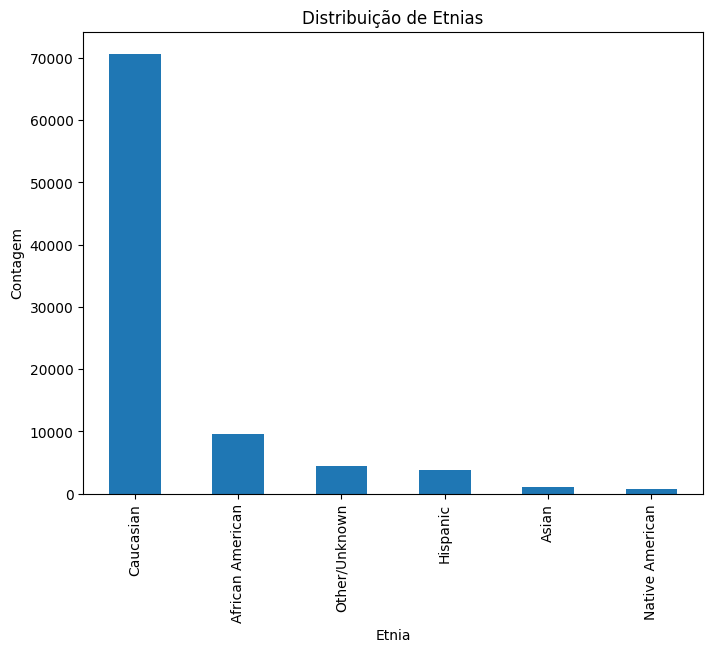

In [409]:
plt.figure(figsize=(8, 6))
etinia_count.plot(kind='bar')
plt.xlabel('Etnia')
plt.ylabel('Contagem')
plt.title('Distribuição de Etnias')
plt.show()


#### Gênero

In [410]:
df['genero'].isnull().sum()

25

In [411]:
df['genero'].unique()

array(['M', 'F', nan], dtype=object)

In [412]:
genero_cont = df['genero'].value_counts()
genero_cont


M    49469
F    42219
Name: genero, dtype: int64

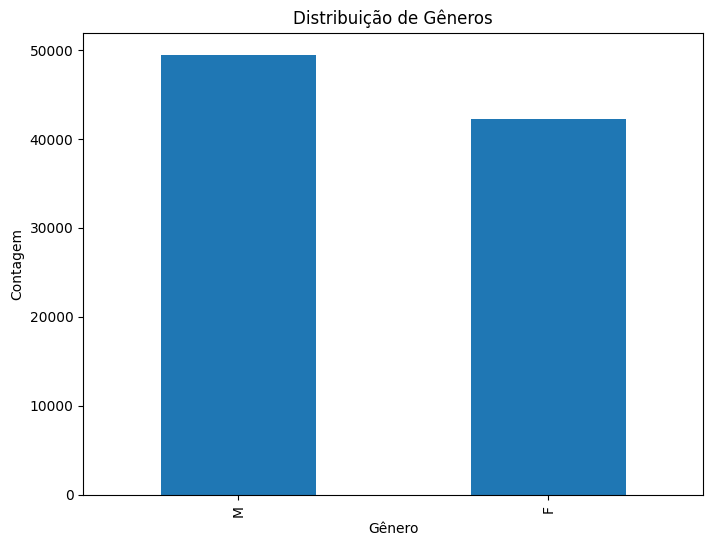

In [413]:
plt.figure(figsize=(8, 6))
genero_cont.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Distribuição de Gêneros')
plt.show()


In [414]:
genero_proporcao = df['genero'].value_counts(normalize=True) * 100
genero_proporcao


M    53.953625
F    46.046375
Name: genero, dtype: float64

#### altura

In [415]:
df['altura'].isnull().sum()

1334

In [416]:
df['altura'].describe()

count    90379.000000
mean       169.641588
std         10.795378
min        137.200000
25%        162.500000
50%        170.100000
75%        177.800000
max        195.590000
Name: altura, dtype: float64

#### peso

In [417]:
df['peso'].isnull().sum()

2720

In [418]:
df['peso'].describe()

count    88993.000000
mean        84.028340
std         25.011497
min         38.600000
25%         66.800000
50%         80.300000
75%         97.100000
max        186.000000
Name: peso, dtype: float64

#### aids

In [419]:
df['aids'].isnull().sum()

715

In [420]:
df['aids'].unique()

array([ 0., nan,  1.])

#### cirrose

In [421]:
df['cirrose'].isnull().sum()

715

In [422]:
df['cirrose'].unique()

array([ 0.,  1., nan])

#### diabetes_mellitus

In [423]:
df['diabetes_mellitus'].isnull().sum()

715

In [424]:
df['diabetes_mellitus'].value_counts()

0.0    70506
1.0    20492
Name: diabetes_mellitus, dtype: int64

In [425]:
df['diabetes_mellitus'].unique()

array([ 1.,  0., nan])

#### insuficiencia_hepatica

In [426]:
df['insuficiencia_hepatica'].isnull().sum()

715

In [427]:
df['insuficiencia_hepatica'].unique()

array([ 0.,  1., nan])

#### imunossupressao

In [428]:
df['imunossupressao'].isnull().sum()

715

In [429]:
df['imunossupressao'].unique()

array([ 0.,  1., nan])

#### leucemia

In [430]:
df['leucemia'].isnull().sum()

715

In [431]:
df['leucemia'].unique()

array([ 0.,  1., nan])

#### linfoma

In [432]:
df['linfoma'].isnull().sum()

715

In [433]:
df['linfoma'].unique()

array([ 0., nan,  1.])

#### tumor_solido_com_metastase

In [434]:
df['tumor_solido_com_metastase'].isnull().sum()

715

In [435]:
df['tumor_solido_com_metastase'].unique()

array([ 0.,  1., nan])

#### fonte_admissao_uti

In [436]:
df['fonte_admissao_uti'].isnull().sum()

112

In [437]:
df['fonte_admissao_uti'].unique()

array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU', nan], dtype=object)

In [438]:
fonte_admissao_uti_count = df['fonte_admissao_uti'].value_counts()
fonte_admissao_uti_count

Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: fonte_admissao_uti, dtype: int64

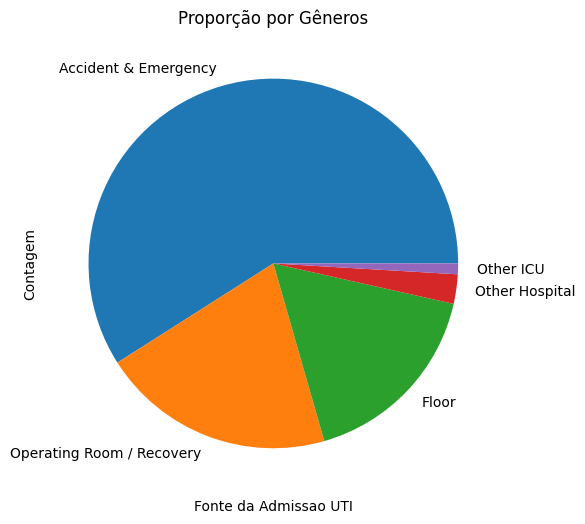

In [439]:
plt.figure(figsize=(8, 6))
fonte_admissao_uti_count.plot(kind='pie')
plt.xlabel('Fonte da Admissao UTI')
plt.ylabel('Contagem')
plt.title('Proporção por Gêneros')
plt.show()

#### cirurgia_eletiva

In [440]:
df['cirurgia_eletiva'].unique()

array([0, 1])

### Historico do paciente no hospital

#### tipo_estadia_uti

Se o paciente foi internado ou transferido

In [441]:
df['tipo_estadia_uti'].unique()

array(['admit', 'readmit', 'transfer'], dtype=object)

In [442]:
df['tipo_estadia_uti'].value_counts()

admit       86183
transfer     4970
readmit       560
Name: tipo_estadia_uti, dtype: int64

#### tipo_uti

Classificação que indica o tipo de atendimento que a unidade é capaz de prestar

In [443]:
df['tipo_uti'].unique()

array(['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU',
       'Cardiac ICU', 'CSICU'], dtype=object)

In [444]:
df['tipo_uti'].value_counts()

Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: tipo_uti, dtype: int64

#### dias_de_permanencia_pre_uti

In [445]:
df['dias_de_permanencia_pre_uti'].unique()

array([ 5.41666667e-01,  9.27777778e-01,  6.94444000e-04, ...,
       -4.73125000e+00,  1.18236111e+01, -3.59305556e+00])

In [446]:
df['dias_de_permanencia_pre_uti'].describe()

count    91713.000000
mean         0.835766
std          2.487756
min        -24.947222
25%          0.035417
50%          0.138889
75%          0.409028
max        159.090972
Name: dias_de_permanencia_pre_uti, dtype: float64

In [447]:
df['dias_de_permanencia_pre_uti'].value_counts()

 0.000000     3711
 0.000694     1403
 0.001389     1011
 0.002083      887
 0.002778      811
              ... 
 8.465972        1
 3.475000        1
 7.479167        1
 13.685417       1
-3.593056        1
Name: dias_de_permanencia_pre_uti, Length: 9757, dtype: int64

#### diagnostico_pache_2

In [448]:
df['diagnostico_pache_2'].unique()

array([113., 108., 122., 203., 119., 301., 116., 112., 303., 218., 304.,
       302., 305., 124., 202., 207., 110., 209., 109., 106., 117., 120.,
        nan, 217., 114., 102., 308., 105., 212., 219., 306., 121., 214.,
       123., 213., 208., 101., 118., 307., 215., 103., 115., 104., 216.,
       107.])

In [449]:
df['diagnostico_pache_2'].describe()

count    90051.000000
mean       185.401739
std         86.050882
min        101.000000
25%        113.000000
50%        122.000000
75%        301.000000
max        308.000000
Name: diagnostico_pache_2, dtype: float64

#### diagnostico_apache_3j

In [450]:
df['diagnostico_apache_3j'].describe()

count    90612.000000
mean       558.216377
std        463.266985
min          0.010000
25%        203.010000
50%        409.020000
75%        703.030000
max       2201.050000
Name: diagnostico_apache_3j, dtype: float64

#### apache_pos_operatorio

In [451]:
df['apache_pos_operatorio'].unique()

array([0, 1])

In [452]:
df['apache_pos_operatorio'].isnull().sum()

0

#### sistema_corporal_apache_3j

In [453]:
df['sistema_corporal_apache_3j'].isnull().sum()

1662

In [454]:
df['sistema_corporal_apache_3j'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [455]:
df['sistema_corporal_apache_3j'].value_counts()

Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: sistema_corporal_apache_3j, dtype: int64

#### sistema_corporal_apache_2

In [456]:
df['sistema_corporal_apache_2'].isnull().sum()

1662

In [457]:
df['sistema_corporal_apache_2'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan,
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses'],
      dtype=object)

In [458]:
df['sistema_corporal_apache_2'].value_counts()

Cardiovascular         38816
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: sistema_corporal_apache_2, dtype: int64

#### morte_hospital

In [459]:
df['morte_hospital'].unique()

array([0, 1])

### O histórico do paciente na primeira hora 

#### d1_pressao_arterial_diastolica_maxima

In [460]:
#df['d1_pressao_arterial_diastolica_maxima'].describe()

## Análise de Correlação

In [461]:
colunas_anterior_internamento = ['idade', 'imc', 'cirurgia_eletiva', 'etnia', 'genero', 'altura', 'aids', 'cirrose', 'diabetes_mellitus',
                            'insuficiencia_hepatica', 'imunossupressao', 'leucemia', 'linfoma', 'tumor_solido_com_metastase', 'morte_hospital']

colunas_durante_internamento = ['fonte_admissao_uti', 'tipo_estadia_uti', 'tipo_uti',
        'dias_de_permanencia_pre_uti', 'peso', 'diagnostico_pache_2',
        'diagnostico_apache_3j', 'apache_pos_operatorio', 'arf_apache',
        'gcs_olhos_apache', 'gcs_motor_apache', 'gcs_incapaz_apache',
        'gcs_verbal_pache', 'frequencia_cardiaca_apache', 'intubado_apache',
        'map_apache', 'frequencia_respiratoria_pache', 'temperatura_apache',
        'ventilado_apache','sistema_corporal_apache_3j','sistema_corporal_apache_2', 'morte_hospital']

colunas_primeira_hora = ['h1_pressão_arterial_diastolica_maxima',
        'h1_ressao_arterial_iastolica_minima',
        'h1_pressao_arterial_diastolica_nao_invasiva_maxima',
        'h1_pressao_arterial_diastolica_nao_invasiva_minima',
        'h1_frequencia_cardiaca_maxima', 'h1_requencia_cardiaca_minima',
        'h1_pressao_arterial_media_maxima', 'h1_pressao_arterial_media_minima',
        'h1_pressao_arterial_media_nao_invasiva_maxima',
        'h1_pressao_arterial_media_nao_invasiva_minima',
        'h1_frequencia_respiratoria_maxima',
        'h1_frequencia_respiratoria_minima', 'h1_spO2_maximo', 'h1_spO2_minimo',
        'h1_pressao_arterial_sistolica_maxima',
        'h1_pressao_arterial_sistolica_minima',
        'h1_pressao_arterial_sistolica_nao_invasiva_maxima',
        'h1_pressão_arterial_sistolica_nao_invasiva_minima', 'morte_hospital']


colunas_primeiras_vinte_quatro = ['d1_pressao_arterial_diastolica_maxima',
        'd1_pressao_arterial_diastolica_minima',
        'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
        'd1_pressao_arterial_diastólica_nao_invasiva_minima',
        'd1_frequencia_cardiaca_maxima', 'd1_frequencia_cardiaca_minima',
        'd1_pressao_arterial_media_maxima', 'd1_pressao_arterial_media_minima',
        'd1_pressao_arterial_media_nao_invasiva_maxima',
        'd1_pressao_arterial_media_nao_invasiva_minima',
        'd1_frequencia_respiratoria_maxima',
        'd1_frequencia_respiratoria_minima', 'd1_spO2_maximo', 'd1_spO2_minimo',
        'd1_pressao_arterial_sistolica_maxima',
        'd1_pressao_arterial_sistolica_minima',
        'd1_pressao_arterial_sistolica_nao_invasiva_maxima',
        'd1_pressao_arterial_sistolica_nao_invasiva_minima',
        'd1_temperatura_maxima', 'd1_temperatura_minima','d1_glicose_maxima', 
        'd1_glicose_minima', 'd1_potassio_maximo',
        'd1_potassio_minimo', 'morte_hospital']

In [462]:
colunas_histotico = ['idade', 'imc', 'cirurgia_eletiva', 'etnia', 'genero', 'altura', 'aids', 'cirrose', 'diabetes_mellitus',
                            'insuficiencia_hepatica', 'imunossupressao', 'leucemia', 'linfoma', 'tumor_solido_com_metastase', 
                            'fonte_admissao_uti', 'tipo_estadia_uti', 'tipo_uti',
        'dias_de_permanencia_pre_uti', 'peso', 'diagnostico_pache_2',
        'diagnostico_apache_3j', 'apache_pos_operatorio', 'arf_apache',
        'gcs_olhos_apache', 'gcs_motor_apache', 'gcs_incapaz_apache',
        'gcs_verbal_pache', 'frequencia_cardiaca_apache', 'intubado_apache',
        'map_apache', 'frequencia_respiratoria_pache', 'temperatura_apache',
        'ventilado_apache','sistema_corporal_apache_3j','sistema_corporal_apache_2', 'morte_hospital']

In [463]:
df.columns

Index(['idade', 'imc', 'cirurgia_eletiva', 'etnia', 'genero', 'altura',
       'fonte_admissao_uti', 'tipo_estadia_uti', 'tipo_uti',
       'dias_de_permanencia_pre_uti', 'peso', 'diagnostico_pache_2',
       'diagnostico_apache_3j', 'apache_pos_operatorio', 'arf_apache',
       'gcs_olhos_apache', 'gcs_motor_apache', 'gcs_incapaz_apache',
       'gcs_verbal_pache', 'frequencia_cardiaca_apache', 'intubado_apache',
       'map_apache', 'frequencia_respiratoria_pache', 'temperatura_apache',
       'ventilado_apache', 'd1_pressao_arterial_diastolica_maxima',
       'd1_pressao_arterial_diastolica_minima',
       'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
       'd1_pressao_arterial_diastólica_nao_invasiva_minima',
       'd1_frequencia_cardiaca_maxima', 'd1_frequencia_cardiaca_minima',
       'd1_pressao_arterial_media_maxima', 'd1_pressao_arterial_media_minima',
       'd1_pressao_arterial_media_nao_invasiva_maxima',
       'd1_pressao_arterial_media_nao_invasiva_minima',
    

In [464]:
colunas_hora = ['h1_pressão_arterial_diastolica_maxima',
        'h1_ressao_arterial_iastolica_minima',
        'h1_pressao_arterial_diastolica_nao_invasiva_maxima',
        'h1_pressao_arterial_diastolica_nao_invasiva_minima',
        'h1_frequencia_cardiaca_maxima', 'h1_requencia_cardiaca_minima',
        'h1_pressao_arterial_media_maxima', 'h1_pressao_arterial_media_minima',
        'h1_pressao_arterial_media_nao_invasiva_maxima',
        'h1_pressao_arterial_media_nao_invasiva_minima',
        'h1_frequencia_respiratoria_maxima',
        'h1_frequencia_respiratoria_minima', 'h1_spO2_maximo', 'h1_spO2_minimo',
        'h1_pressao_arterial_sistolica_maxima',
        'h1_pressao_arterial_sistolica_minima',
        'h1_pressao_arterial_sistolica_nao_invasiva_maxima',
        'h1_pressão_arterial_sistolica_nao_invasiva_minima',
        'd1_pressao_arterial_diastolica_maxima',
        'd1_pressao_arterial_diastolica_minima',
        'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
        'd1_pressao_arterial_diastólica_nao_invasiva_minima',
        'd1_frequencia_cardiaca_maxima', 'd1_frequencia_cardiaca_minima',
        'd1_pressao_arterial_media_maxima', 'd1_pressao_arterial_media_minima',
        'd1_pressao_arterial_media_nao_invasiva_maxima',
        'd1_pressao_arterial_media_nao_invasiva_minima',
        'd1_frequencia_respiratoria_maxima',
        'd1_frequencia_respiratoria_minima', 'd1_spO2_maximo', 'd1_spO2_minimo',
        'd1_pressao_arterial_sistolica_maxima',
        'd1_pressao_arterial_sistolica_minima',
        'd1_pressao_arterial_sistolica_nao_invasiva_maxima',
        'd1_pressao_arterial_sistolica_nao_invasiva_minima',
        'd1_temperatura_maxima', 'd1_temperatura_minima','d1_glicose_maxima', 
        'd1_glicose_minima', 'd1_potassio_maximo',
        'd1_potassio_minimo', 'morte_hospital']

# Profiling

In [465]:
from pandas_profiling import ProfileReport

df = pd.read_parquet('parte_1_profiling.parquet')

profile = ProfileReport(df)
profile.to_file("parte1_relatorio.html")



/home/bianka/.local/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning:

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.

/home/bianka/.local/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/tmp/ipykernel_33315/1005874946.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id_ncontro                                   91713 non-null  int64  
 1   id_paciente                                  91713 non-null  int64  
 2   id_hospital                                  91713 non-null  int64  
 3   idade                                        87485 non-null  float64
 4   imc                                          88284 non-null  float64
 5   cirurgia_eletiva                             91713 non-null  int64  
 6   etnia                                        90318 non-null  object 
 7   genero                                       91688 non-null  object 
 8   altura                                       90379 non-null  float64
 9   fonte_admissao_uti                           91601 non-null  object 
 10

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets
from IPython.display import display

# Suponha que você já tenha o DataFrame df_training carregado

# Função para criar e exibir histogramas interativos
def plot_histogram(column, hospital_death):
    # Filtrar o DataFrame com base na opção hospital_death
    if hospital_death == '0':
        filtered_df = df[df['morte_hospital'] == 0]
    elif hospital_death == '1':
        filtered_df = df[df['morte_hospital'] == 1]
    else:
        filtered_df = df.copy()
    
    # Criar o histograma interativo
    fig = px.histogram(filtered_df, x=column, title=f"{column} vs morte_hospital ({'morte_hospital'})")
    fig.show()

# Opções para a análise
columns = df.columns.tolist()
columns.remove('morte_hospital')  # Remover a coluna 'hospital_death' da lista de colunas

# Widgets interativos para seleção
column_dropdown = widgets.Dropdown(options=columns, description='Coluna:')
morte_hospital_radio = widgets.RadioButtons(options=['Todos', '0', '1'], description='Filtrar por morte_hospital:')

# Criação do widget de interação
interact(plot_histogram, column=column_dropdown, hospital_death=morte_hospital_radio)


interactive(children=(Dropdown(description='Coluna:', options=('id_ncontro', 'id_paciente', 'id_hospital', 'id…

<function __main__.plot_histogram(column, hospital_death)>

In [ ]:
contagem_morte_hospital_1 = df.groupby('morte_hospital').count()
contagem_morte_hospital_1

,id_ncontro,id_paciente,id_hospital,idade,imc,cirurgia_eletiva,etnia,genero,altura,fonte_admissao_uti,id_uti,tipo_estadia_uti,tipo_uti,dias_de_permanencia_pre_uti,peso,diagnostico_pache_2,diagnostico_apache_3j,apache_pos_operatorio,arf_apache,gcs_olhos_apache,gcs_motor_apache,gcs_incapaz_apache,gcs_verbal_pache,frequencia_cardiaca_apache,intubado_apache,map_apache,frequencia_respiratoria_pache,temperatura_apache,ventilado_apache,probabilidade_morte_no_hospital_(apache_4a),probabilidade_morte_na_uti_(apache_4a),aids,cirrose,diabetes_mellitus,insuficiencia_hepatica,imunossupressao,leucemia,linfoma,tumor_solido_com_metastase,sistema_corporal_apache_3j,sistema_corporal_apache_2
morte_hospital,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,83798,83798,83798,80212,80732,83798,82508,83781,82654,83698,83798,83798,83798,83798,81319,82272,82826,83798,83168,82226,82226,82888,82226,83026,83168,82928,82687,80249,83168,76403,76403,83168,83168,83168,83168,83168,83168,83168,83168,82272,82272
1,7915,7915,7915,7273,7552,7915,7810,7907,7725,7903,7915,7915,7915,7915,7674,7779,7786,7915,7830,7586,7586,7788,7586,7809,7830,7791,7792,7356,7830,7363,7363,7830,7830,7830,7830,7830,7830,7830,7830,7779,7779
